# Homework 5: Sample t and U tests

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

***
## Problem 1 - Null distribution of a one-sample vs two sample t

We've spent a lot of time discussing the "null distribution".
- The null hypothesis for a 1 sample t test is that the mean of the normal population our data comes from is equal to our hypothesized mean, $\mu$. Therefore, the null distribution is the distribution of t values we expect to observe if we randomly sample from a normal population that has a mean equal to our hypothesized mean, $\mu$.
- The null hypothesis for a 2 sample t test can be more nuanced, depending on the assumptions we make about each samples standard deviations. Here, we will consider the independent, equal sample size, equal variance two-sample t test.

### 1.1 First task: Confirm we can calculate t correctly

Let's start by firsting making sure we can calculate t correctly. For this problem, let's use the heights of players (in centimeters) randomly selected from the LA Lakers and Boston Celtics rosters:

Lakers = [200, 210, 220,225,215];

Heat = [190, 220, 193, 200, 190];

In the space below, calculate the 1 sample t value for the Lakers, assuming their average height is 195 cm, and the two-sample t value for this data. Confirm your answers using ttest_1samp and ttest_ind. Be sure to **note** the technicality discussion on the last slide of Lecture 11.

In [1]:
from scipy import stats
import statsmodels.api as sm
import numpy as np
import pandas as pd

lakers = np.array([200, 210, 220, 225, 215])
heat = np.array([190, 220, 193, 200, 190])
df = {'Lakers':  lakers, 'Heat': heat}

def tvalue_1Samp(sample, mu):
    n = len(sample)
    X = np.mean(sample)
    S = np.std(sample, ddof=1)
    t = np.sqrt(n)*(X - mu)/S
    return t

def tvalue_2Samp(sample1, sample2):
    y = np.concatenate((sample1, sample2))
    x = np.concatenate((np.ones(len(sample1)), np.zeros(len(sample2))))
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    return results.tvalues[1]

custom_tv_1samp = tvalue_1Samp(lakers, 195)
scipy_tv_1samp = stats.ttest_1samp(lakers, 195).statistic

custom_tv_2samp = tvalue_2Samp(lakers, heat)
scipy_tv_2samp = stats.ttest_ind(lakers, heat, axis=0, equal_var=True).statistic

print(f"t-value (1 sample): {custom_tv_1samp} (custom) || {scipy_tv_1samp} (scipy)")
print(f"t-value (2 samples): {custom_tv_2samp} (custom) || {scipy_tv_2samp} (scipy)")

t-value (1 sample): 4.417410272265133 (custom) || 4.4174102722651325 (scipy)
t-value (2 samples): 2.167939197635676 (custom) || 2.167939197635687 (scipy)


### 1.2 Second task: Compare t distributions for 1 and 2 sample tests

- In the space below, write the code necessary to create null distributions for single and two-sample t tests when:
    - For the single sample t test, you are collecting 9 samples
    - For the two sample t test, you are collected 5 samples for each group.
- Produce density plots to compare the two distributions.
    - Be sure to select enough samples and to adjust bins sizes as needed so that the density plots are clear and stable (meaning each time you run it, you basically get the same answer).
    - Can use density feature of plt.hist or Seaborn's  sns function.
    - On the figure, clearly indicate the degrees of freedom for the specific t test
    - Unclear figures will not receive credit.

In [2]:
import random

def t_distribution(data, s, onesample=True, L=25000):
    μ = np.mean(data)
    data = data.tolist()
    randcollect = lambda data, s: random.sample(data, k=s)
    if onesample:
        dist = [tvalue_1Samp(randcollect(data, s), μ) for j in range(1, L)]
    else:
        dist = [tvalue_2Samp(randcollect(data, s), randcollect(data, s)) for j in range(1, L)]
    return dist

mu = 195
sigma = 10
N = 50000
norm_data = np.random.normal(mu, sigma, N)
t_dist_1s = t_distribution(norm_data, 9, onesample=True)
t_dist_2s = t_distribution(norm_data, 5, onesample=False)
df = pd.DataFrame.from_dict({'ttest_1s':  t_dist_1s, 'ttest_2s': t_dist_2s})

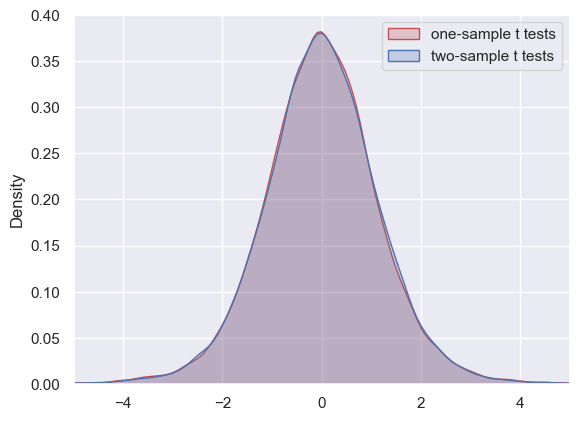

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig = sns.kdeplot(t_dist_1s, fill=True, color="r")
fig = sns.kdeplot(t_dist_2s, fill=True, color="b")
plt.legend(["one-sample t tests", "two-sample t tests"])
plt.xlim(-5, 5)
plt.show()

Based on your figure(s) above, how do the two distributions compare? 

<div class="alert alert-block alert-info">
<b>Comments: The two null distributions overlap, indicating that the distribution is independent of the t-value test performed</b>.
</div>

## Compute p value for two-sample t test
- Using your null t distribution for your two sample t test, what is the likelihood that the heights of the Lakers and Heat come from populations with the same means?
- Check your answer using ttest_ind

In [4]:
custom_p_value = sum(t_dist_2s >= custom_tv_2samp)/len(t_dist_2s)
scipy_p_value = stats.ttest_ind(lakers, heat, axis=0, equal_var=True).pvalue
print(f"p-value: {custom_p_value*2} (custom) || {scipy_p_value} (scipy)")

p-value: 0.061602464098563944 (custom) || 0.06201738353641719 (scipy)


***